# 1 Importing and joining Dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
## for google colab
# df_f = pd.read_csv("/content/drive/MyDrive/Datasets/UNSW-NB15/NUSW-NB15_features.csv", encoding='cp1252')

## for local drive
df_f = pd.read_csv("./kaggle/input/NUSW-NB15_features.csv", encoding='cp1252')
pd.set_option('display.max_columns', None) #display all columns

In [3]:
df_f.drop(columns=df_f.columns[0], axis=1, inplace=True)

In [4]:
df_f

,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,Indicates to the state and its dependent proto...
6,dur,Float,Record total duration
7,sbytes,Integer,Source to destination transaction bytes
8,dbytes,Integer,Destination to source transaction bytes
9,sttl,Integer,Source to destination time to live value


In [5]:
df_f['Name'].unique()

array(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label'],
      dtype=object)

In [6]:
features = df_f['Name'].tolist()

In [7]:
df1 = pd.read_csv("./kaggle/input/UNSW-NB15_1.csv", names=features)
df2 = pd.read_csv("./kaggle/input/UNSW-NB15_2.csv", names=features)
df3 = pd.read_csv("./kaggle/input/UNSW-NB15_3.csv", names=features)
df4 = pd.read_csv("./kaggle/input/UNSW-NB15_4.csv", names=features)

C:\Users\hhi20\AppData\Local\Temp\ipykernel_12764\2756057312.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("./kaggle/input/UNSW-NB15_1.csv", names=features)
C:\Users\hhi20\AppData\Local\Temp\ipykernel_12764\2756057312.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./kaggle/input/UNSW-NB15_2.csv", names=features)


In [8]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(700001, 49)
(700001, 49)
(700001, 49)
(440044, 49)


In [9]:
df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_all

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.937500,621800.937500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.085940,50480.171880,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.531300,636282.375000,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.562500,542597.187500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.250000,609067.562500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0


In [10]:
df_all.to_csv("UNSWNB15.csv", index=False)

# 2 Preprocessing

## 2.1 Cleansing Data

In [10]:
# dropping unneccassary columns
df_all.drop({'srcip', 'sport', 'dstip', 'dsport'}, axis=1, inplace=True)

In [11]:
# drop stime and ltime since we have duration
# df_all.drop({'Stime', 'Ltime'}, axis=1, inplace=True)

In [12]:
df_all.shape

(2540047, 45)

In [13]:
df_all['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [14]:
df_all = df_all.replace(r'^\s*$', np.nan, regex=True)

df_all['attack_cat'] = df_all['attack_cat'].str.strip(' ')
df_all['attack_cat'] = df_all['attack_cat'].str.replace('Backdoors', 'Backdoor')
df_all['attack_cat'] = df_all['attack_cat'].fillna('normal')

df_all['ct_ftp_cmd'] = df_all['ct_ftp_cmd'].astype('float64')

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 45 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Stime             int64  
 25  Ltime             int64  
 26  Sintpkt       

In [16]:
df_all['attack_cat'].nunique()

10

In [17]:
df_all['attack_cat'].value_counts()

attack_cat
normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64

In [18]:
df_all['Label'].value_counts()

Label
0    2218764
1     321283
Name: count, dtype: int64

In [19]:
print('attack_cat: ', df_all['attack_cat'].isna().sum())
print('number of 0 label: ', df_all['Label'][df_all.Label == 0].count())

#number of null values = to number of normal label then null value in attack_cat means no attack

attack_cat:  0
number of 0 label:  2218764


In [20]:
# both column "ct_flw_http_mthd", "is_ftp_login" and "ct_ftp_cmd" have Null Values (replace, drop or ignore)!!!!!!!!!!

# df_all['ct_flw_http_mthd'].isnull().value_counts()

df_all.columns[df_all.isna().any()].tolist()


['ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd']

In [21]:
print('ct_flw_http_mthd: ', df_all['ct_flw_http_mthd'].isna().sum())
print('is_ftp_login: ', df_all['is_ftp_login'].isna().sum())
print('ct_ftp_cmd: ', df_all['ct_ftp_cmd'].isna().sum())

ct_flw_http_mthd:  1348145
is_ftp_login:  1429879
ct_ftp_cmd:  1429879


In [22]:
# drop all rows with Null values
df_all = df_all.dropna(how='any',axis=0)

In [23]:
df_all['attack_cat'].value_counts()

attack_cat
normal            1064988
Generic              7522
Exploits             5409
Fuzzers              5051
Reconnaissance       1759
DoS                  1167
Backdoor              534
Analysis              526
Shellcode             223
Worms                  24
Name: count, dtype: int64

## 2.2 Label Encoding

In [24]:
categorical_features = ['proto', 'state', 'service', 'attack_cat']
category_dfs = {}

for feature in categorical_features:
    categories = df_all[feature].unique()
    category_mapping = {category: i for i, category in enumerate(categories)}
    df_all[feature] = df_all[feature].map(category_mapping)
    category_df = pd.DataFrame({'Category': categories, f'{feature}_code': range(len(categories))})
    category_dfs[feature] = category_df

df_proto = category_dfs['proto']
df_state = category_dfs['state']
df_service = category_dfs['service']
df_attack_cat = category_dfs['attack_cat']

del category_df, category_dfs

In [25]:
df_proto

,Category,proto_code
0,udp,0
1,arp,1
2,tcp,2
3,ospf,3
4,icmp,4
...,...,...
130,pipe,130
131,iplt,131
132,unas,132
133,fc,133


In [26]:
df_all

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,0,0,0.001055,132,164,31,29,0,0,0,5.004739e+05,6.218009e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,3,7,1,3,1,1,1,0,0
1,0,0,0.036133,528,304,31,29,0,0,1,8.767609e+04,5.048017e+04,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,2,4,2,3,1,1,2,0,0
2,0,0,0.001119,146,178,31,29,0,0,0,5.218945e+05,6.362824e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,12,8,1,2,2,1,1,0,0
3,0,0,0.001209,132,164,31,29,0,0,0,4.367246e+05,5.425972e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,6,9,1,1,1,1,1,0,0
4,0,0,0.001169,146,178,31,29,0,0,0,4.995722e+05,6.090676e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,7,9,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087198,2,0,0.308446,31366,2566,31,29,15,6,3,7.941747e+05,6.434838e+04,42,30,255,255,42932937,44002642,747,86,0,0,714.631067,25.183766,1421972723,1421972724,7.504049,10.615586,0.000724,0.000590,0.000134,0,0,0.0,0.0,0.0,1,1,2,1,1,1,1,0,0
1087199,2,2,0.006390,2054,2478,31,29,6,6,1,2.455086e+06,2.973396e+06,22,24,255,255,2248312090,103257044,93,103,0,0,18.467615,14.483103,1421972724,1421972724,0.298850,0.247174,0.000840,0.000701,0.000139,0,0,0.0,0.0,0.0,2,4,1,3,1,1,1,0,0
1087200,2,2,0.222470,8928,320,31,29,4,1,4,2.981436e+05,9.601295e+03,14,6,255,255,1950416979,108279257,638,53,0,0,1578.162777,67.547828,1421972724,1421972724,17.113078,44.367000,0.000579,0.000467,0.000112,0,0,0.0,0.0,0.0,3,3,2,3,1,1,2,0,0
1087201,2,0,0.004158,890,8896,31,29,2,4,2,1.498798e+06,1.540548e+07,8,10,255,255,222930142,224542400,111,890,1,3924,37.976649,21.801424,1421972724,1421972724,0.594000,0.381778,0.000719,0.000557,0.000162,0,0,1.0,0.0,0.0,1,1,2,2,1,1,2,0,0


In [27]:
# !pip install imbalanced-learn

In [28]:
# map numeric labels to corresponding categories
df_all['Label'] = df_all['Label'].map({0: 'normal', 1: 'anomaly'})

In [29]:
df_all['Label'].value_counts()

Label
normal     1064988
anomaly      22215
Name: count, dtype: int64

c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


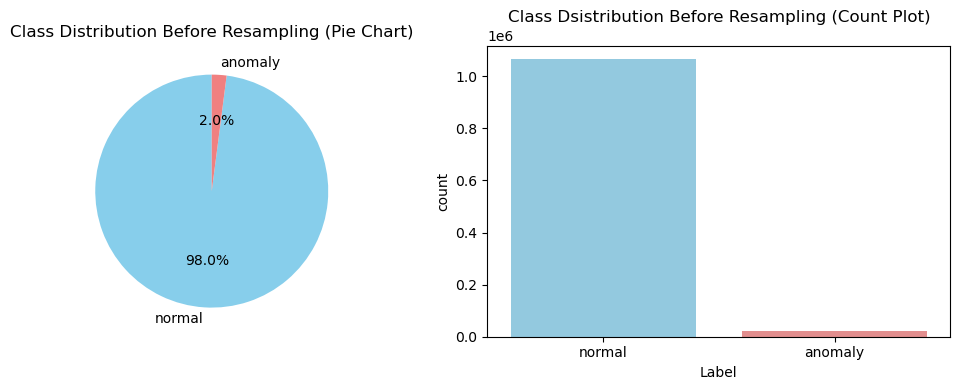

In [30]:
# set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# pie chart for class distribution
pie_colors = ['skyblue', 'lightcoral']
axes[0].pie(df_all['Label'].value_counts(), labels=df_all['Label'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
axes[0].set_title('Class Distribution Before Resampling (Pie Chart)')

# Count plot for class distribution
countplot_colors = sns.color_palette(pie_colors)
sns.countplot(x='Label', data=df_all, palette= countplot_colors, ax=axes[1])
axes[1].set_title('Class Dsistribution Before Resampling (Count Plot)')

# Adjust layout
plt.tight_layout()
plt.show()

## Splitting dataset

In [31]:
# split the dataset into features (X) and Label (Y)
X = df_all.drop(['attack_cat','Label'], axis=1)
Y = df_all['attack_cat']

In [32]:
# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

# 3 Resampling

In [33]:
# function to plot the class distribution after resampling
def plot_resampling_results(Y_resampled, title):
  plt.figure(figsize=(4, 4))
  pd.Series(Y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
  plt.title(title)
  plt.show()

## 3.1 Random Undersampling (RUS)

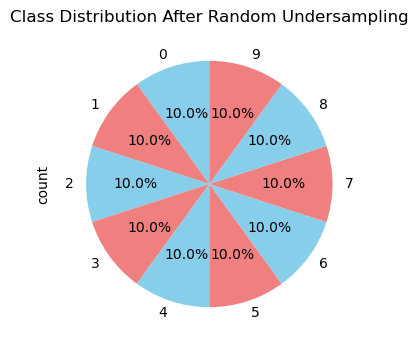

In [34]:
rus = RandomUnderSampler(random_state=101) # pass the parameter sampling_strategy = "RATIO" (sampling_strategy=0.7) for sampling other than 50/50 -> minority/majority
X_rus, Y_rus = rus.fit_resample(X_train, Y_train)
plot_resampling_results(Y_rus, 'Class Distribution After Random Undersampling')

In [35]:
# Label column Before Undersampling
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [36]:
# Label column After Undersampling
Y_rus.value_counts()

attack_cat
0    20
1    20
2    20
3    20
4    20
5    20
6    20
7    20
8    20
9    20
Name: count, dtype: int64

In [37]:
print('No. of records discarded: ', Y_train.shape[0] - Y_rus.shape[0])

No. of records discarded:  869562


## 3.2 Random Oversampling (ROS)

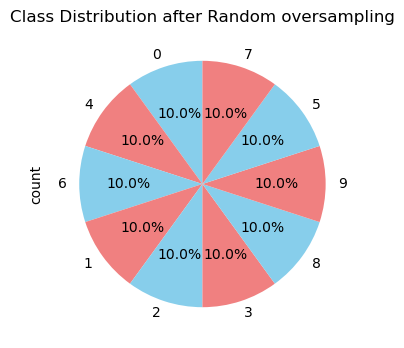

In [38]:
ros = RandomOverSampler(random_state=111)
X_ros, Y_ros = ros.fit_resample(X_train, Y_train)
plot_resampling_results(Y_ros, 'Class Distribution after Random oversampling')

In [39]:
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [40]:
Y_ros.value_counts()

attack_cat
0    852031
4    852031
6    852031
1    852031
2    852031
3    852031
8    852031
9    852031
5    852031
7    852031
Name: count, dtype: int64

In [41]:
print("No. of records added: ", Y_ros.shape[0] - Y_train.shape[0])

No. of records added:  7650548


In [42]:
X_ros.duplicated().value_counts()

True     7696746
False     823564
Name: count, dtype: int64

## 3.4 Synthetic Minority Over-sampling Technique (SMOTE)

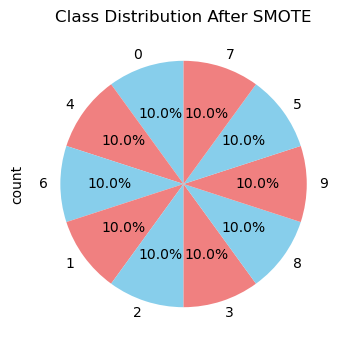

In [43]:
smote = SMOTE(random_state=123)
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)
plot_resampling_results(Y_smote, 'Class Distribution After SMOTE')

In [44]:
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [45]:
Y_smote.value_counts()

attack_cat
0    852031
4    852031
6    852031
1    852031
2    852031
3    852031
8    852031
9    852031
5    852031
7    852031
Name: count, dtype: int64

In [46]:
print("No. of records added: ", Y_smote.shape[0] - Y_train.shape[0])

No. of records added:  7650548


In [47]:
X_smote.duplicated().value_counts()

False    6179490
True     2340820
Name: count, dtype: int64

## 3.6 ADASYN Oversampling

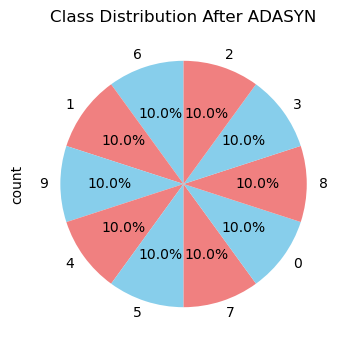

In [48]:
adasyn = ADASYN(random_state=211)
X_adasyn, Y_adasyn = adasyn.fit_resample(X_train, Y_train)
plot_resampling_results(Y_adasyn, 'Class Distribution After ADASYN')

In [49]:
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [50]:
Y_adasyn.value_counts()

attack_cat
6    852135
1    852106
9    852103
4    852062
5    852048
7    852040
0    852031
8    851985
3    851807
2    851740
Name: count, dtype: int64

In [51]:
print("No. of records added: ", Y_adasyn.shape[0] - Y_train.shape[0])

No. of records added:  7650295


In [52]:
X_adasyn.duplicated().value_counts()

False    7213184
True     1306873
Name: count, dtype: int64

## 3.7 Combine Smote & Randomundersampling

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from collections import Counter

class_counts = Counter(Y_train)
majority_class_label = max(class_counts, key=class_counts.get)
majority_class_size = class_counts[majority_class_label]

sampling_strategy_under = {majority_class_label: int(majority_class_size * 0.25)}

under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)
X_rus2, y_rus2 = under.fit_resample(X_train, Y_train)

new_majority_class_size = max(Counter(y_rus2).values())

sampling_strategy_over = {class_label: new_majority_class_size for class_label in np.unique(y_rus2) if class_label != majority_class_label}

over = SMOTE(sampling_strategy=sampling_strategy_over)
X_RusSmote, Y_RusSmote = over.fit_resample(X_rus2, y_rus2)

In [54]:
print("No. of records added: ", Y_RusSmote.shape[0] - Y_train.shape[0])

No. of records added:  1260308


In [55]:
X_RusSmote.duplicated().value_counts()

False    1601598
True      528472
Name: count, dtype: int64

# 4 Feature Selection

## 4.2 Correlation

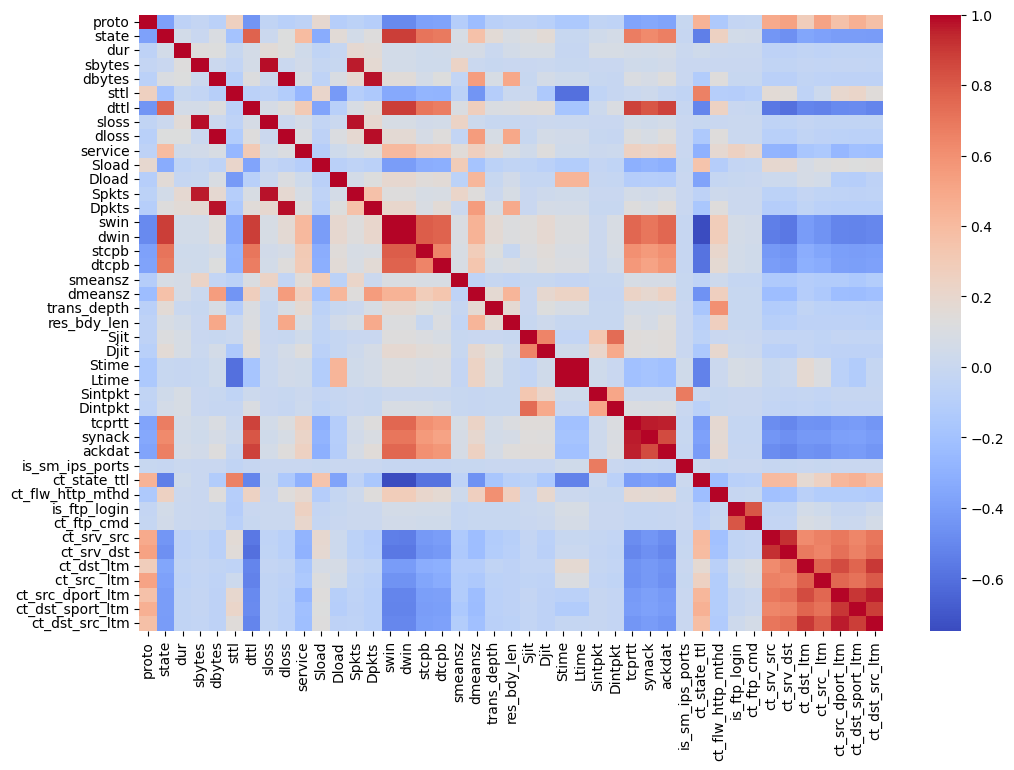

In [56]:
import seaborn as sns

# select highly correlated features
# will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
  col_corr = set()  # set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]  # getting the name of the column
        col_corr.add(colname)
  return col_corr

#using Pearson correlation

plt.figure(figsize=(12,8))
cor = X_smote.corr()
sns.heatmap(cor, annot=False, cmap='coolwarm')
plt.show()

In [57]:
corr_features = correlation(X_smote, 0.9)
len(set(corr_features))

11

In [58]:
corr_features

{'Dpkts',
 'Ltime',
 'Spkts',
 'ackdat',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'dloss',
 'dwin',
 'sloss',
 'synack'}

In [59]:
# second version

def show_correlation(data, method='pearson'):
    correlation_matrix = data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
    fig = plt.figure(figsize=(12,9))
    sns.heatmap(correlation_matrix, square = True, cmap='coolwarm') #  annot=True, if fig should show the correlation score too
    plt.show()
    return correlation_matrix

def top_correlations(correlations, limit=0.9):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if correlations.iloc[i,j] >= limit:
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")

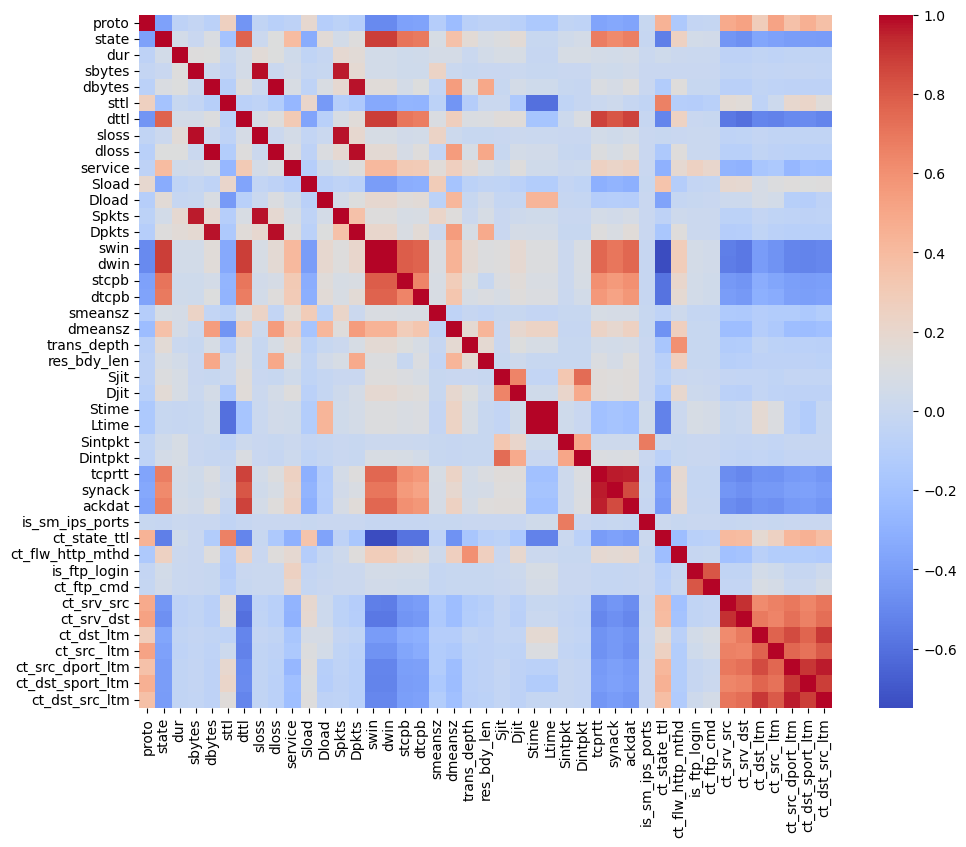

In [60]:
correlation_matrix = show_correlation(X_smote)

In [61]:
top_correlations(correlation_matrix, limit=0.9)

sbytes sloss 0.9853211036239753
sbytes Spkts 0.9619503424536691
dbytes dloss 0.9977531618978374
dbytes Dpkts 0.9768591332841724
sloss Spkts 0.9779465650131793
dloss Dpkts 0.9798072179784729
swin dwin 0.9998344787694504
Stime Ltime 0.9999984335272564
tcprtt synack 0.9653932399567369
tcprtt ackdat 0.9577042794988712
ct_srv_src ct_srv_dst 0.9182586246385185
ct_src_dport_ltm ct_dst_sport_ltm 0.9060315582508691
ct_src_dport_ltm ct_dst_src_ltm 0.9606058140764001


In [62]:
# drop highly correlated columns

## 4.3 Random Forest (RF)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
X_rf_train_russmote = rf_sel.fit_transform(X_RusSmote, Y_RusSmote)


In [64]:
X_rf_train_russmote

array([[2.0000e+00, 1.0360e+03, 2.2620e+03, ..., 0.0000e+00, 9.0000e+00,
        5.0000e+00],
       [2.0000e+00, 2.7500e+03, 2.7344e+04, ..., 0.0000e+00, 1.0000e+01,
        9.0000e+00],
       [2.0000e+00, 3.7850e+04, 3.2760e+03, ..., 0.0000e+00, 1.0000e+00,
        3.0000e+00],
       ...,
       [7.8000e+01, 2.0000e+02, 0.0000e+00, ..., 2.0000e+00, 1.2000e+01,
        1.2000e+01],
       [1.3100e+02, 2.0000e+02, 0.0000e+00, ..., 2.0000e+00, 1.5000e+01,
        1.5000e+01],
       [2.0000e+00, 8.1400e+02, 1.0760e+03, ..., 1.0000e+00, 7.0000e+00,
        4.0000e+00]])

In [65]:
selected_features = X_RusSmote.columns[rf_sel.get_support()]
X_rf_train_russmote_df = pd.DataFrame(X_rf_train_russmote, columns=selected_features)

In [66]:
X_rf_train_russmote_df

,proto,sbytes,dbytes,sttl,service,Sload,Dload,smeansz,dmeansz,Stime,Ltime,ct_state_ttl,ct_srv_src,ct_srv_dst
0,2.0,1036.0,2262.0,31.0,1.0,1.580699e+06,3.450915e+06,86.0,189.0,1.421934e+09,1.421934e+09,0.0,9.0,5.0
1,2.0,2750.0,27344.0,31.0,1.0,1.504092e+06,1.496818e+07,63.0,594.0,1.421950e+09,1.421950e+09,0.0,10.0,9.0
2,2.0,37850.0,3276.0,31.0,3.0,1.346746e+07,1.158238e+06,701.0,82.0,1.421953e+09,1.421953e+09,0.0,1.0,3.0
3,0.0,520.0,304.0,31.0,1.0,1.909425e+06,1.116279e+06,130.0,76.0,1.421943e+09,1.421943e+09,0.0,2.0,3.0
4,2.0,1540.0,1644.0,31.0,1.0,6.336808e+05,6.815140e+05,96.0,91.0,1.421963e+09,1.421963e+09,0.0,10.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130065,118.0,200.0,0.0,254.0,1.0,8.000000e+07,0.000000e+00,100.0,0.0,1.421931e+09,1.421931e+09,2.0,13.0,13.0
2130066,24.0,180.0,0.0,254.0,1.0,6.545454e+07,0.000000e+00,90.0,0.0,1.421931e+09,1.421931e+09,2.0,14.0,14.0
2130067,78.0,200.0,0.0,254.0,1.0,8.000000e+07,0.000000e+00,100.0,0.0,1.421931e+09,1.421931e+09,2.0,12.0,12.0
2130068,131.0,200.0,0.0,254.0,1.0,8.000000e+08,0.000000e+00,100.0,0.0,1.421931e+09,1.421931e+09,2.0,15.0,15.0


In [67]:
Y_RusSmote

0          0
1          0
2          0
3          0
4          0
          ..
2130065    9
2130066    9
2130067    9
2130068    9
2130069    9
Name: attack_cat, Length: 2130070, dtype: int64

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
rf_sel.fit(X_RusSmote, Y_RusSmote)

rf_selected_features = rf_sel.get_support()
rf_selected_feat= X_train.columns[rf_selected_features]
print("Number of selected features:", len(rf_selected_feat))
print("Selected Features:", rf_selected_feat)

Number of selected features: 15
Selected Features: Index(['proto', 'dur', 'sbytes', 'dbytes', 'sttl', 'service', 'Sload', 'Dload',
       'smeansz', 'dmeansz', 'Stime', 'Ltime', 'ct_state_ttl', 'ct_srv_src',
       'ct_srv_dst'],
      dtype='object')


<Axes: >

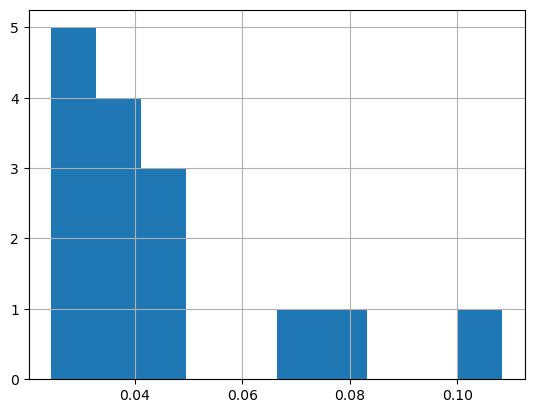

In [69]:
# Create new DataFrames with only the selected features for both training and testing sets
X_train_rf_selected = X_train.loc[:, rf_selected_features]
X_test_rf_selected = X_test.loc[:, rf_selected_features]

# To visualize the feature importances:
pd.Series(rf_sel.estimator_.feature_importances_[rf_selected_features]).hist()

In [70]:
X_train_rf_selected

,proto,dur,sbytes,dbytes,sttl,service,Sload,Dload,smeansz,dmeansz,Stime,Ltime,ct_state_ttl,ct_srv_src,ct_srv_dst
418987,2,0.017866,2958,32650,31,1,1.297212e+06,1.432755e+07,62,653,1421944889,1421944889,0,22,4
541495,2,0.009200,2230,13358,31,1,1.882609e+06,1.129304e+07,66,371,1421948055,1421948055,0,8,6
478572,2,0.928651,37232,3172,31,1,3.145724e+05,2.661064e+04,716,83,1421945536,1421945537,0,13,15
352903,0,0.001056,146,178,31,0,5.530303e+05,6.742424e+05,73,89,1421942056,1421942056,0,2,2
450656,2,1.006582,1684,10168,31,1,1.243018e+04,7.632959e+04,120,565,1421945233,1421945234,0,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324434,0,0.036229,520,304,31,1,8.611886e+04,5.034641e+04,130,76,1421940732,1421940732,0,7,5
836167,2,1.856635,2934,3740,31,5,1.240093e+04,1.581786e+04,56,69,1421961964,1421961966,0,2,1
57676,2,0.056461,3926,57474,31,1,5.479181e+05,8.023804e+06,59,845,1421929715,1421929716,0,5,5
728155,0,0.000914,130,162,31,0,5.689278e+05,7.089716e+05,65,81,1421957160,1421957160,0,4,6


## 4.4 Information Gain (IG)

In [71]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize and fit the selection model with Information Gain
ig_sel = SelectKBest(mutual_info_classif, k=9)  # 'k' can be set to select a specific number of features
ig_sel.fit(X_train, Y_train)

ig_selected_features = ig_sel.get_support()

ig_selected_feat = X_train.columns[ig_selected_features]
print("Number of selected features:", len(ig_selected_feat))
print("Selected Features:", ig_selected_feat)

Number of selected features: 9
Selected Features: Index(['state', 'sbytes', 'sttl', 'dttl', 'swin', 'dwin', 'ct_state_ttl',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm'],
      dtype='object')


<Axes: >

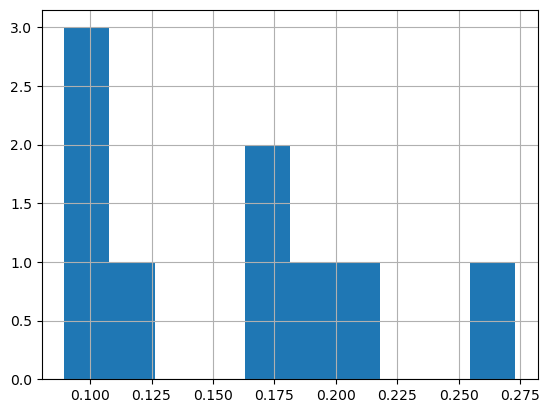

In [72]:
# Create new DataFrames with only the selected features for both training and testing sets
X_train_IF_selected = X_train.loc[:, ig_selected_features]
X_test_IF_selected = X_test.loc[:, ig_selected_features]

# Optionally, to visualize the feature importances (mutual information scores):
pd.Series(ig_sel.scores_[ig_selected_features]).hist()

## SelectKBest

In [73]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature selection using SelectKBest with ANOVA F-statistic as the scoring function
# You can adjust the k value based on your requirements
k_best = 10  # Example: Select top 10 features
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

#using the SelectKBest method from scikit-learn
# Print the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
print(f"Selected Feature Indices: {selected_feature_indices}")

# Train a model on the selected features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_selected)

# Evaluate the model performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy on the Test Set: {accuracy}")

#if you want eliminated 
num_eliminated_features = X_train.shape[1] - len(selected_feature_indices)
print(f"Number of Eliminated Features: {num_eliminated_features}")

Selected Feature Indices: [ 0  5  6 10 24 25 28 29 30 32]
Accuracy on the Test Set: 0.9923427504472477
Number of Eliminated Features: 33


In [74]:
X_selectkbest_df = pd.DataFrame(X_train_selected, columns=[X_train.columns[i] for i in selected_feature_indices])
X_selectkbest_df

,proto,sttl,dttl,Sload,Stime,Ltime,tcprtt,synack,ackdat,ct_state_ttl
0,2.0,31.0,29.0,1.297212e+06,1.421945e+09,1.421945e+09,0.000661,0.000529,0.000132,0.0
1,2.0,31.0,29.0,1.882609e+06,1.421948e+09,1.421948e+09,0.000768,0.000619,0.000149,0.0
2,2.0,31.0,29.0,3.145724e+05,1.421946e+09,1.421946e+09,0.000694,0.000538,0.000156,0.0
3,0.0,31.0,29.0,5.530303e+05,1.421942e+09,1.421942e+09,0.000000,0.000000,0.000000,0.0
4,2.0,31.0,29.0,1.243018e+04,1.421945e+09,1.421945e+09,0.000593,0.000458,0.000135,0.0
...,...,...,...,...,...,...,...,...,...,...
869757,0.0,31.0,29.0,8.611886e+04,1.421941e+09,1.421941e+09,0.000000,0.000000,0.000000,0.0
869758,2.0,31.0,29.0,1.240093e+04,1.421962e+09,1.421962e+09,0.000660,0.000517,0.000143,0.0
869759,2.0,31.0,29.0,5.479181e+05,1.421930e+09,1.421930e+09,0.000605,0.000481,0.000124,0.0
869760,0.0,31.0,29.0,5.689278e+05,1.421957e+09,1.421957e+09,0.000000,0.000000,0.000000,0.0


## 4.5 IGRF

In [75]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate Information Gain
def calc_information_gain(X_train, Y_train):
    ig = mutual_info_classif(X_train, Y_train)
    return pd.Series(ig, index=X_train.columns)

# Train Random Forest and get feature importances
def random_forest_importances(X_train, Y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, Y_train)
    return pd.Series(rf.feature_importances_, index=X_train.columns)

# Combine both methods and select features
def select_features(X_train, Y_train):
    ig_scores = calc_information_gain(X_train, Y_train)
    rf_scores = random_forest_importances(X_train, Y_train)

    # Combine scores (here we simply average them, but you can use more complex methods)
    combined_scores = (ig_scores + rf_scores) / 2

    # Select features with combined score above a threshold (e.g., median)
    threshold = combined_scores.median()
    selected_features = combined_scores[combined_scores > threshold].index.tolist()

    # Select the same features from the test set
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    return X_train_selected, X_test_selected

# Example usage
X_train_IGRF_selected, X_test_IGRF_selected = select_features(X_train, Y_train)


In [76]:
X_train_IGRF_selected

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,Sload,Dload,swin,dwin,smeansz,dmeansz,Ltime,Dintpkt,tcprtt,ackdat,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm
418987,2,2,0.017866,2958,32650,31,29,1,1.297212e+06,1.432755e+07,255,255,62,653,1421944889,0.353755,0.000661,0.000132,0,4,4
541495,2,2,0.009200,2230,13358,31,29,1,1.882609e+06,1.129304e+07,255,255,66,371,1421948055,0.244886,0.000768,0.000149,0,1,1
478572,2,2,0.928651,37232,3172,31,29,1,3.145724e+05,2.661064e+04,255,255,716,83,1421945537,25.084027,0.000694,0.000156,0,3,3
352903,0,0,0.001056,146,178,31,29,0,5.530303e+05,6.742424e+05,0,0,73,89,1421942056,0.009000,0.000000,0.000000,0,1,1
450656,2,2,1.006582,1684,10168,31,29,1,1.243018e+04,7.632959e+04,255,255,120,565,1421945234,59.183353,0.000593,0.000135,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324434,0,0,0.036229,520,304,31,29,1,8.611886e+04,5.034641e+04,0,0,130,76,1421940732,7.707667,0.000000,0.000000,0,1,1
836167,2,2,1.856635,2934,3740,31,29,5,1.240093e+04,1.581786e+04,255,255,56,69,1421961966,35.020945,0.000660,0.000143,0,1,1
57676,2,2,0.056461,3926,57474,31,29,1,5.479181e+05,8.023804e+06,255,255,59,845,1421929716,0.835448,0.000605,0.000124,0,1,1
728155,0,0,0.000914,130,162,31,29,0,5.689278e+05,7.089716e+05,0,0,65,81,1421957160,0.005000,0.000000,0.000000,0,2,1


## 4.6 RFE

In [78]:
# import pandas as pd
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# clf = RandomForestClassifier(random_state=42)

# num_features_to_select = 10
# rfe = RFE(clf, n_features_to_select=num_features_to_select)

# X_train_rfe = rfe.fit_transform(X_train, Y_train)
# X_test_rfe = rfe.transform(X_test)

# clf.fit(X_train_rfe, Y_train)

# y_pred = clf.predict(X_test_rfe)

# # Evaluate the model performance
# accuracy = accuracy_score(Y_test, y_pred)
# print(f"Accuracy on the Test Set: {accuracy}")

# selected_feature_indices = [i for i, selected in enumerate(rfe.support_) if selected]
# print(f"Selected Feature Indices: {selected_feature_indices}")

In [ ]:
# X_train_rfe_df = pd.DataFrame(X_train_rfe, columns=[X_train.columns[i] for i in selected_feature_indices])
# X_test_rfe_df = pd.DataFrame(X_test_rfe, columns=[X_test.columns[i] for i in selected_feature_indices])

In [ ]:
# X_train_rfe_df

## 4.7 CHI2

In [79]:
#model 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Feature selection with chi2
selector_chi2 = SelectKBest(score_func=chi2, k=10)
selector_chi2.fit(X_train, Y_train)
features_chi2 = X_train.columns[selector_chi2.get_support()]

# Feature selection with mutual information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi.fit(X_train, Y_train)
features_mi = X_train.columns[selector_mi.get_support()]
# Evaluate accuracy using a machine learning model (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Without feature selection
model_base = RandomForestClassifier()
model_base.fit(X_train, Y_train)
base_accuracy = model_base.score(X_test, Y_test)

# With feature selection using chi2
model_chi2 = RandomForestClassifier()
model_chi2.fit(X_train[features_chi2], Y_train)
chi2_accuracy = model_chi2.score(X_test[features_chi2], Y_test)

# With feature selection using mutual information
model_mi = RandomForestClassifier()
model_mi.fit(X_train[features_mi], Y_train)
mi_accuracy = model_mi.score(X_test[features_mi], Y_test)

print("Accuracy without feature selection:", base_accuracy)
print("Accuracy with chi2 feature selection:", chi2_accuracy)
print("Accuracy with mutual information feature selection:", mi_accuracy)


Accuracy without feature selection: 0.9947296048123399
Accuracy with chi2 feature selection: 0.9935430760528143
Accuracy with mutual information feature selection: 0.9927290621363957


# Models

## CNN

In [80]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, Flatten
# from keras.utils import to_categorical

# model = Sequential()
# model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train_rf_selected.shape[1], 1)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(Y_RusSmote.shape[0], activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train_rf_selected, Y_RusSmote, epochs=10, validation_data=(X_test_rf_selected, Y_test))


In [81]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from sklearn.metrics import classification_report

# # Reshape data for 1D convolutional layer
# X_train_cnn = np.expand_dims(X_RusSmote, axis=2)
# X_test_cnn = np.expand_dims(X_test, axis=2)

# # Define the CNN model
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(int(len(np.unique(Y_RusSmote))), activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_cnn, Y_RusSmote, epochs=10, batch_size=64, validation_data=(X_test_cnn, Y_test))

# # Evaluate the model on the test set
# Y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)
# print(classification_report(Y_test, Y_pred_cnn, target_names=[str(i) for i in range(10)]))

In [82]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from sklearn.metrics import classification_report

# # Reshape data for 1D convolutional layer
# X_train_cnn = np.expand_dims(X_rus, axis=2)
# X_test_cnn = np.expand_dims(X_test, axis=2)

# # Define the CNN model
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(int(len(np.unique(Y_rus))), activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_cnn, Y_rus, epochs=10, batch_size=64, validation_data=(X_test_cnn, Y_test))

# # Evaluate the model on the test set
# Y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)
# print(classification_report(Y_test, Y_pred_cnn, target_names=[str(i) for i in range(10)]))
